In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [18]:
slk = pd.read_csv("../data/solar-measurements_sierraleone-kenema_qc.csv", encoding='ISO-8859-1', skiprows=[1])
slb = pd.read_csv("../data/solar-measurements_sierraleone-bumbuna_qc.csv", encoding='ISO-8859-1 ', skiprows=[1])
bm = pd.read_csv("../data/solar-measurements_benin-malanville_qc.csv", encoding='ISO-8859-1', skiprows=[1])
bp = pd.read_csv("../data/solar-measurements_benin-parakou_qc.csv", encoding='ISO-8859-1', skiprows=[1])
tdp = pd.read_csv("../data/solar-measurements_togo-dapaong_qc.csv", encoding='ISO-8859-1', skiprows=[1])
tda = pd.read_csv("../data/solar-measurements_togo-davie_qc.csv", encoding='ISO-8859-1', skiprows=[1])

C:\Users\Fevu\AppData\Local\Temp\ipykernel_2364\1082508605.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  slk = pd.read_csv("../data/solar-measurements_sierraleone-kenema_qc.csv", encoding='ISO-8859-1', skiprows=[1])
C:\Users\Fevu\AppData\Local\Temp\ipykernel_2364\1082508605.py:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  bp = pd.read_csv("../data/solar-measurements_benin-parakou_qc.csv", encoding='ISO-8859-1', skiprows=[1])


In [19]:
print(slk.columns)
slk.head()

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-11-18 00:01,-1.0,-0.3,-1.0,0.0,0.0,24.1,98.8,0.1,0.7,0.4,206.5,1.3,996,0,0.0,24.2,24.3,NaN
1,2021-11-18 00:02,-1.0,-0.3,-0.9,0.0,0.0,24.1,98.8,0.6,1.4,0.6,218.0,7.0,996,0,0.0,24.2,24.3,NaN
2,2021-11-18 00:03,-1.0,-0.3,-0.9,0.0,0.0,24.1,98.9,0.1,1.1,0.4,211.9,0.7,996,0,0.0,24.2,24.3,NaN
3,2021-11-18 00:04,-1.0,-0.2,-1.0,0.0,0.0,24.1,98.9,0.2,1.1,0.4,220.3,1.5,996,0,0.0,24.2,24.3,NaN
4,2021-11-18 00:05,-1.0,-0.2,-1.0,0.0,0.0,24.2,99.0,0.4,1.4,0.6,214.5,4.2,996,0,0.0,24.2,24.4,NaN


In [20]:
def convert_to_float(df):
    df = df.select_dtypes(include="object")
    print(df.columns)
    df_floats = df.select_dtypes(include="object").drop(columns=["Timestamp","Comments"]).astype(float)
    df = pd.concat([slk["Timestamp","Comments"],df_floats])
    return df

In [21]:
slk_floats = slk.select_dtypes(include="object").drop(columns=["Timestamp","Comments"]).astype(float)
slk = pd.concat([slk[["Timestamp","Comments"]],slk_floats])

In [22]:
slb.select_dtypes(include="object")

,Timestamp
0,2021-10-30 00:01
1,2021-10-30 00:02
2,2021-10-30 00:03
3,2021-10-30 00:04
4,2021-10-30 00:05
...,...
525595,2022-10-29 23:56
525596,2022-10-29 23:57
525597,2022-10-29 23:58
525598,2022-10-29 23:59


In [23]:
bm.select_dtypes(include="object")

,Timestamp
0,2021-08-09 00:01
1,2021-08-09 00:02
2,2021-08-09 00:03
3,2021-08-09 00:04
4,2021-08-09 00:05
...,...
525595,2022-08-08 23:56
525596,2022-08-08 23:57
525597,2022-08-08 23:58
525598,2022-08-08 23:59


In [24]:
bp_floats = bp.select_dtypes(include="object").drop(columns=["Timestamp","Comments"]).astype(float)
bp = pd.concat([bp[["Timestamp","Comments"]],bp_floats])

In [25]:
tda.select_dtypes(include="object")

,Timestamp
0,2021-11-03 00:01
1,2021-11-03 00:02
2,2021-11-03 00:03
3,2021-11-03 00:04
4,2021-11-03 00:05
...,...
525595,2022-11-02 23:56
525596,2022-11-02 23:57
525597,2022-11-02 23:58
525598,2022-11-02 23:59


In [26]:
tdp.select_dtypes(include="object")

,Timestamp
0,2021-10-25 00:01
1,2021-10-25 00:02
2,2021-10-25 00:03
3,2021-10-25 00:04
4,2021-10-25 00:05
...,...
525595,2022-10-24 23:56
525596,2022-10-24 23:57
525597,2022-10-24 23:58
525598,2022-10-24 23:59


In [27]:
# slk_cleaned.drop(columns="Timestamp").describe()
print(slk.describe())
print(slb.describe())
print(bm.describe())
print(bp.describe())
print(tdp.describe())
print(tda.describe())


                 GHI            DNI            DHI           ModA  \
count  525553.000000  525553.000000  525553.000000  525553.000000   
mean      197.447272     106.930387     115.830499     201.959985   
std       296.808380     214.456544     161.205183     299.956384   
min       -14.400000     -17.500000     -14.200000       0.000000   
25%        -2.500000      -0.300000      -2.500000       0.000000   
50%         0.300000      -0.100000       0.400000       3.500000   
75%       341.900000      51.600000     228.100000     340.600000   
max      1500.000000    1068.900000     944.200000    1463.000000   

                ModB           Tamb             RH             WS  \
count  525553.000000  525553.000000  525553.000000  525553.000000   
mean      190.699609      25.829660      83.111411       0.860066   
std       283.702955       3.756484      15.348309       1.051518   
min         0.000000      15.200000      18.500000       0.000000   
25%         0.000000      23.0000

In [48]:
columns_to_check = ['GHI', 'DNI', 'DHI']
tables_to_check = [slk,slb,bm,bp,tdp,tda]
for index, df in enumerate(tables_to_check):
    print(index)
    df[columns_to_check] = df[columns_to_check].applymap(lambda x: x if x >= 0 else 0)
    print(df.isnull().sum())


0


C:\Users\Fevu\AppData\Local\Temp\ipykernel_2364\1205723392.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_check] = df[columns_to_check].applymap(lambda x: x if x >= 0 else 0)


Comments         1051153
GHI                    0
DNI                    0
DHI                    0
ModA              525647
ModB              525647
Tamb              525647
RH                525647
WS                525647
WSgust            525647
WSstdev           525647
WD                525647
WDstdev           525647
BP                525647
Cleaning          525647
Precipitation     525647
TModA             525647
TModB             525647
dtype: int64
1


C:\Users\Fevu\AppData\Local\Temp\ipykernel_2364\1205723392.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_check] = df[columns_to_check].applymap(lambda x: x if x >= 0 else 0)


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
2


C:\Users\Fevu\AppData\Local\Temp\ipykernel_2364\1205723392.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_check] = df[columns_to_check].applymap(lambda x: x if x >= 0 else 0)


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
3


C:\Users\Fevu\AppData\Local\Temp\ipykernel_2364\1205723392.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_check] = df[columns_to_check].applymap(lambda x: x if x >= 0 else 0)


Comments         973440
GHI                   0
DNI                   0
DHI                   0
ModA             526786
ModB             526748
Tamb             526632
RH               526632
WS               526632
WSgust           526632
WSstdev          526632
WD               526632
WDstdev          526632
BP               526632
Cleaning         526632
Precipitation    526632
TModA            526632
TModB            526632
dtype: int64
4


C:\Users\Fevu\AppData\Local\Temp\ipykernel_2364\1205723392.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_check] = df[columns_to_check].applymap(lambda x: x if x >= 0 else 0)


GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
GHIrsi                0
Comments         525600
dtype: int64
5


C:\Users\Fevu\AppData\Local\Temp\ipykernel_2364\1205723392.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_check] = df[columns_to_check].applymap(lambda x: x if x >= 0 else 0)


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [29]:
tables_to_check = [slb,bm,tdp]
for df in tables_to_check:
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    df.set_index('Timestamp', inplace=True)

In [85]:
# Function for correlation analysis
def correlation_analysis(df, country_name):
    corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Analysis for {country_name}')
    plt.show()



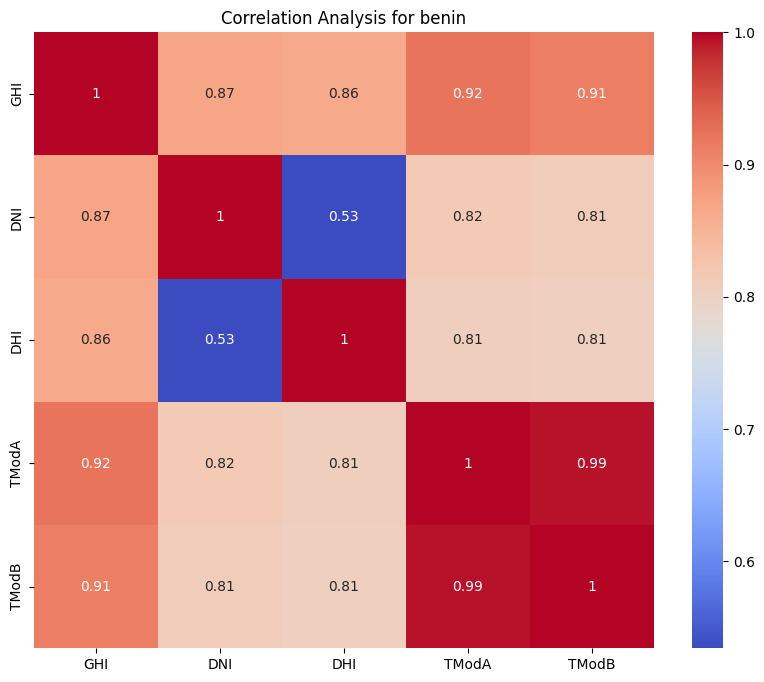

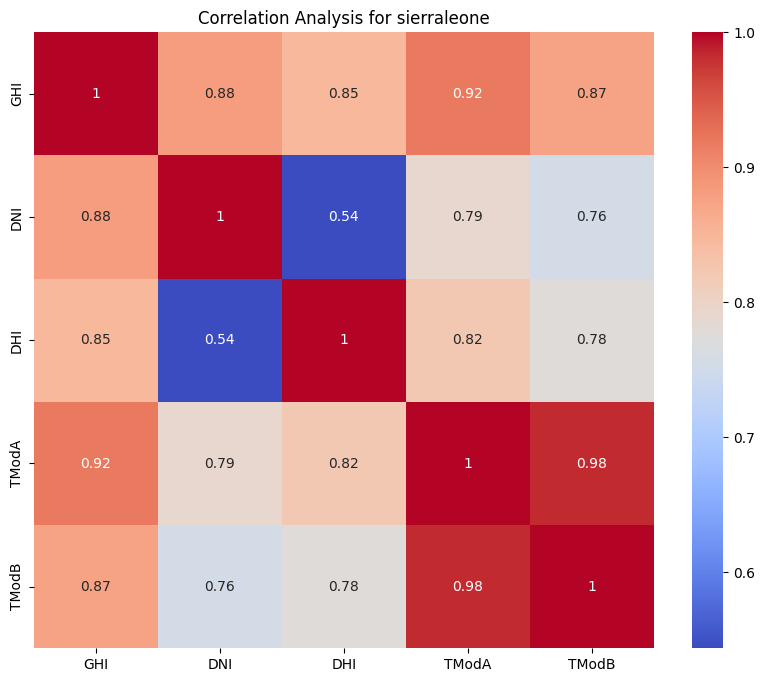

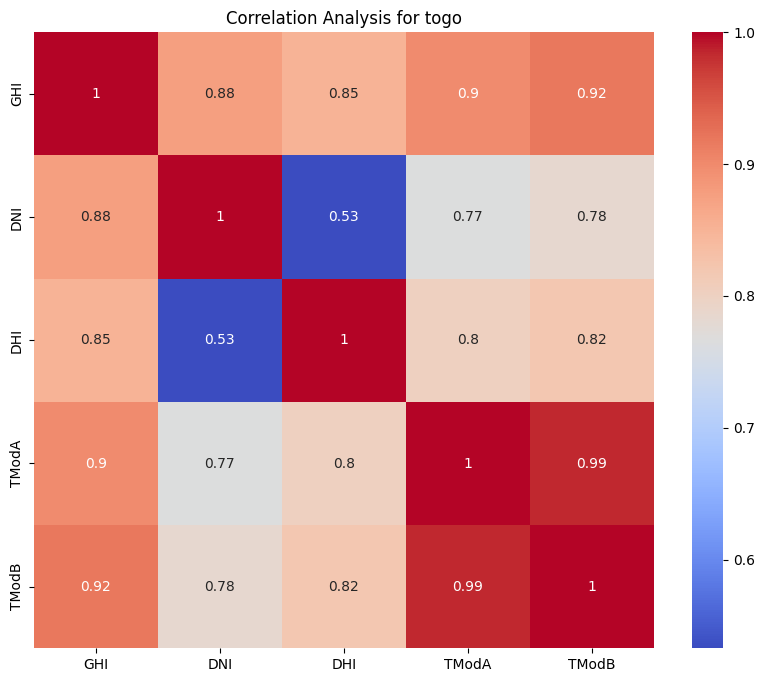

In [86]:
tables_to_check = [slb,bm,tdp]
country_name = ["benin","sierraleone","togo"]
for index,df in enumerate(tables_to_check):
    correlation_analysis(df,country_name[index])

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_wind_analysis(df, country_name):
    plt.figure(figsize=(18, 6))
    
    # Wind Speed vs. Wind Direction (Scatter Plot)
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='WD', y='WS', data=df, alpha=0.6)
    plt.title(f'{country_name} Wind Direction vs. Speed')
    plt.xlabel('Wind Direction (°)')
    plt.ylabel('Wind Speed (m/s)')
    plt.grid(True)
    
    # Wind Speed Distribution (Histogram)
    plt.subplot(1, 2, 2)
    sns.histplot(df['WS'], bins=30, kde=True)
    plt.title(f'{country_name} Wind Speed Distribution')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    # Polar Plot for Wind Direction and Speed
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, projection='polar')
    
    # Convert wind direction to radians
    theta = np.deg2rad(df['WD'])
    r = df['WS']
    
    # Create polar plot
    ax.scatter(theta, r, c=r, cmap='viridis', alpha=0.75)
    ax.set_title(f'{country_name} Wind Speed and Direction (Polar Plot)')
    ax.set_xlabel('Wind Direction (°)')
    ax.set_ylabel('Wind Speed (m/s)')
    
    plt.show()

# Example usage



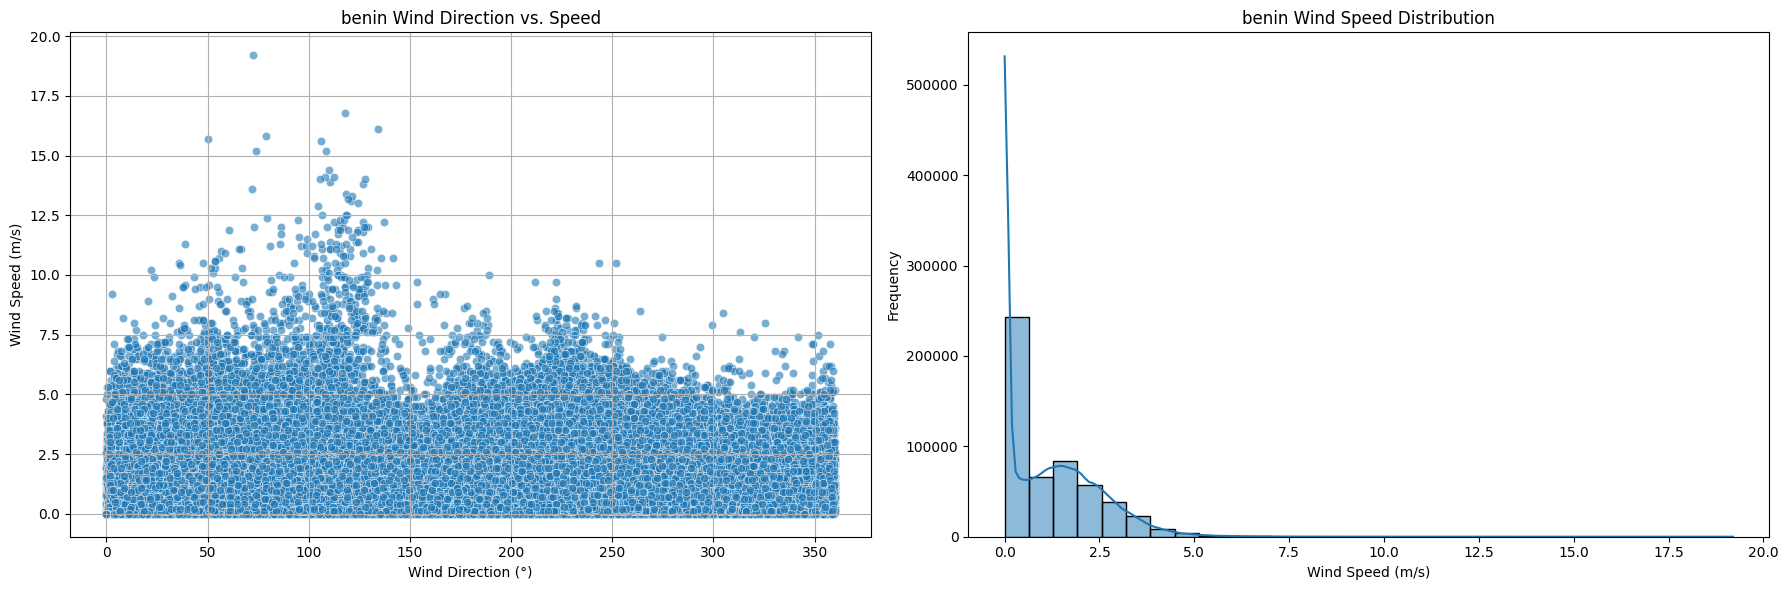

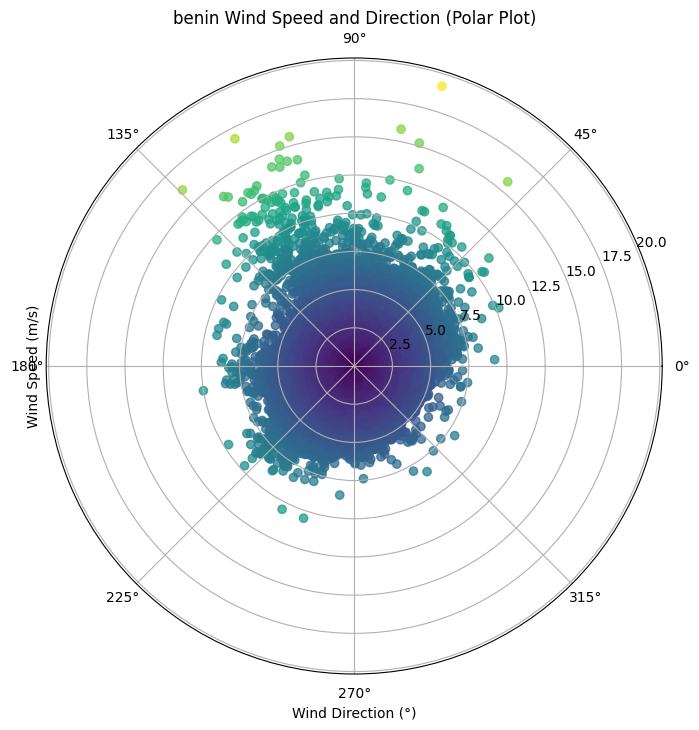

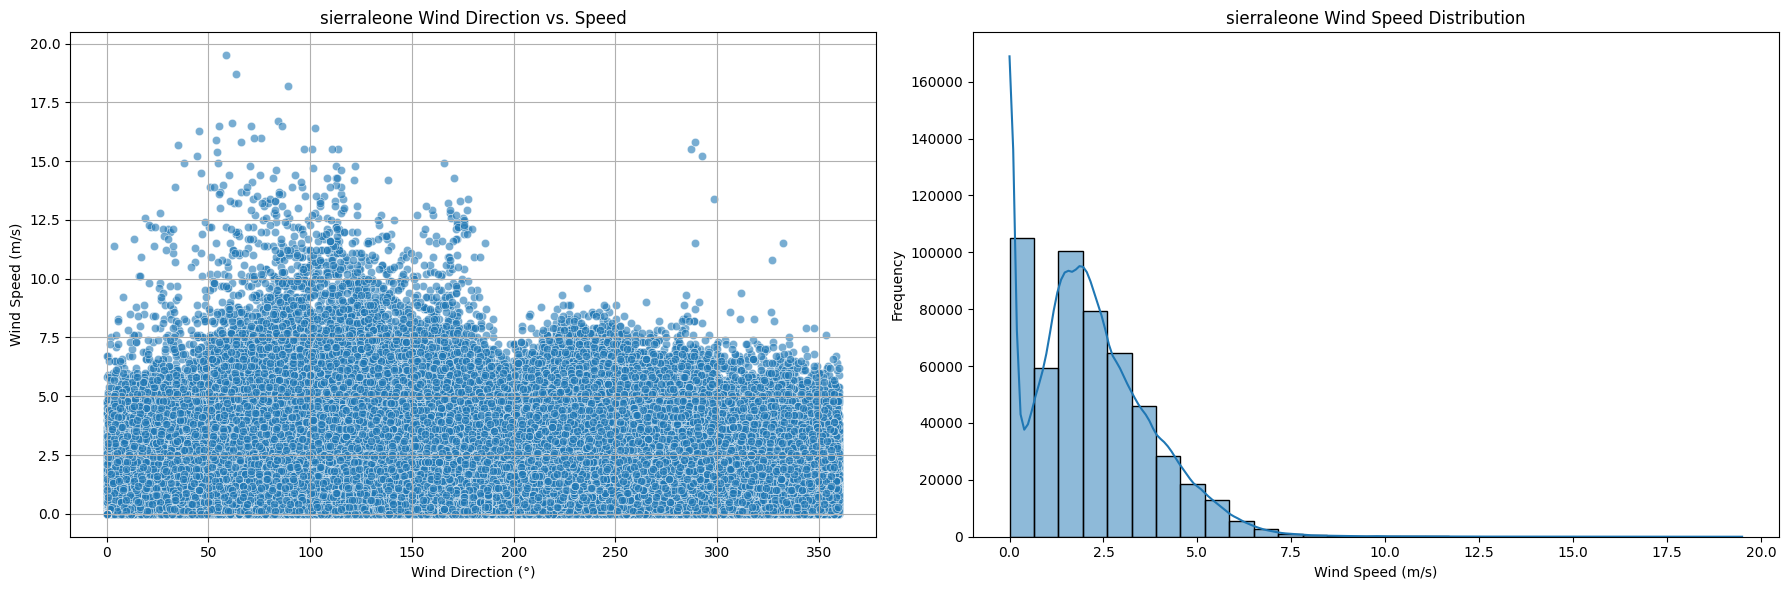

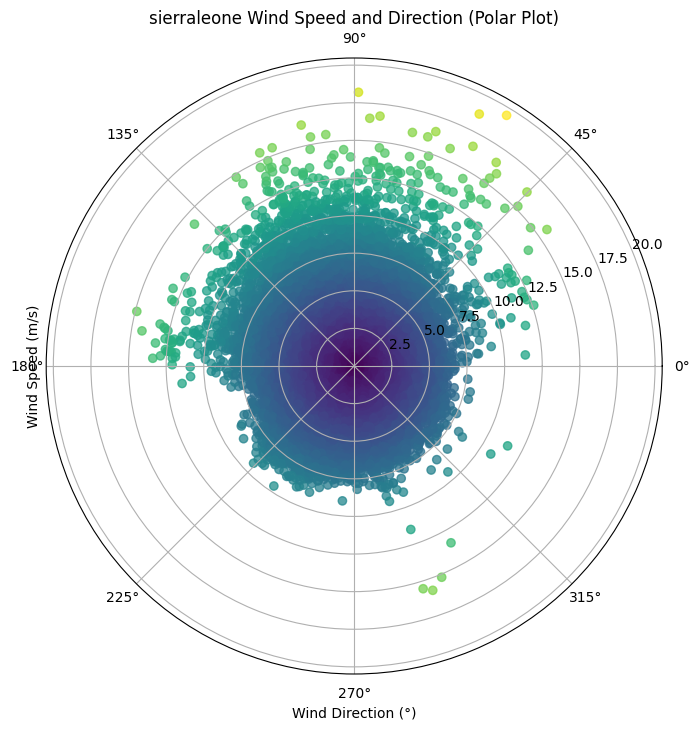

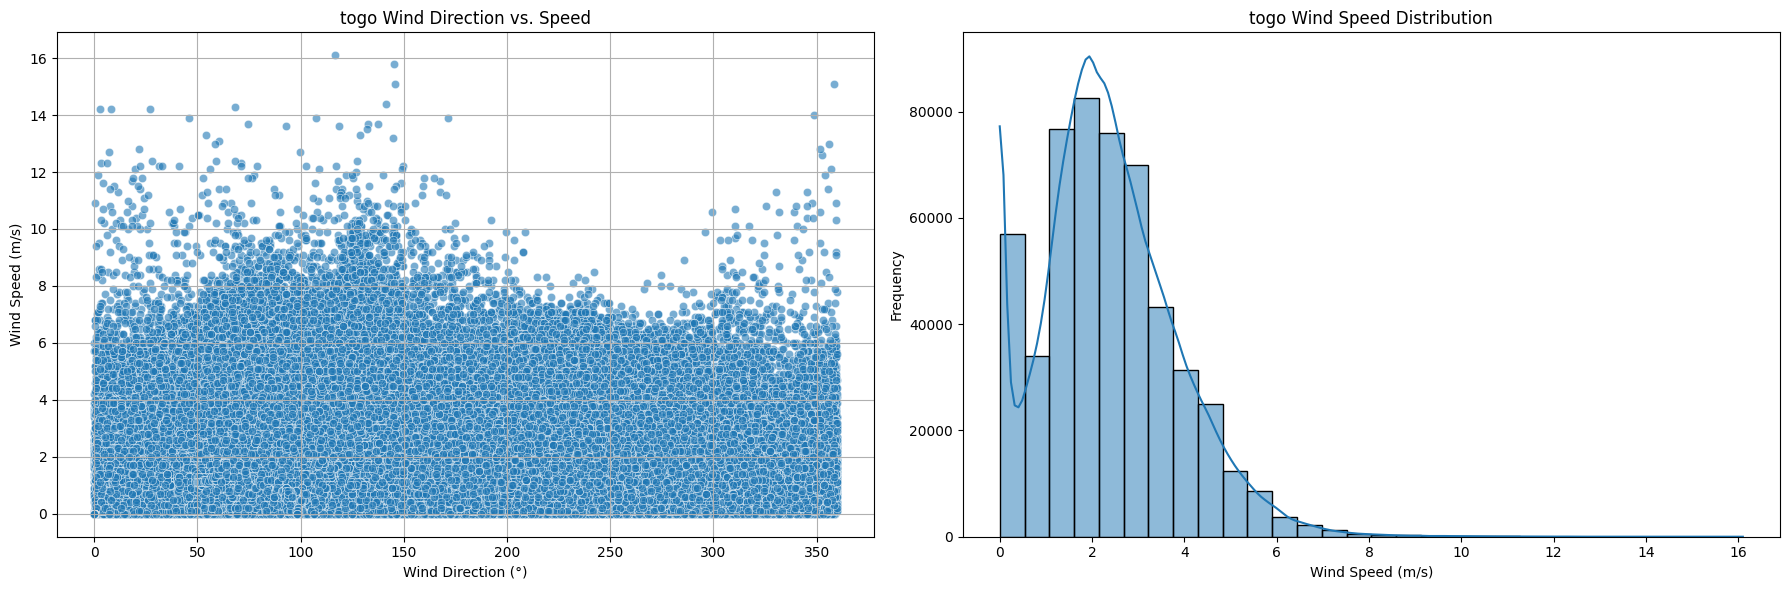

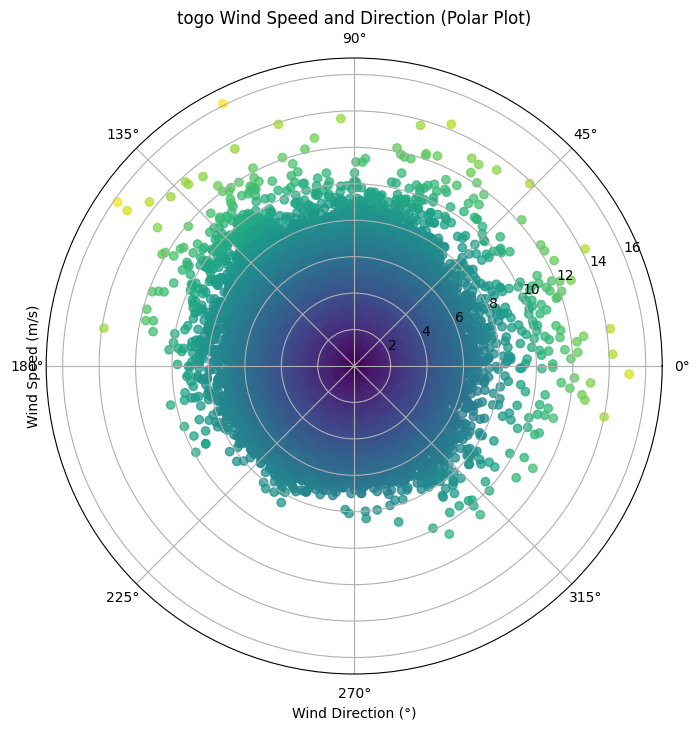

In [57]:
tables_to_check = [slb,bm,tdp]
country_name = ["benin","sierraleone","togo"]
for index,df in enumerate(tables_to_check):
    plot_wind_analysis(df, country_name[index])

In [77]:
def z_score_analysis(df, country_name):
    # Select relevant columns and drop rows with NaN values
    columns_of_interest = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'TModA', 'TModB', 'WS', 'WSgust']
    data = df[columns_of_interest].dropna()
    
    # Calculate z-scores for the selected columns
    z_scores = np.abs(stats.zscore(data))
    
    # Flatten z_scores array for histogram plotting
    flattened_z_scores = np.array(z_scores).flatten()  
    plt.figure(figsize=(14, 6))
    
    # Histogram of Z-Scores
    plt.subplot(1, 2, 1)
    plt.hist(flattened_z_scores, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Z-Score Distribution for {country_name}')
    plt.xlabel('Z-Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


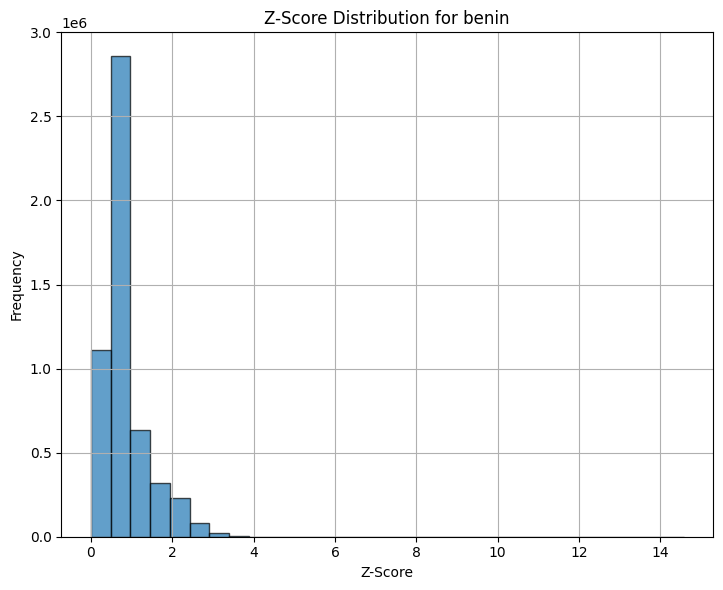

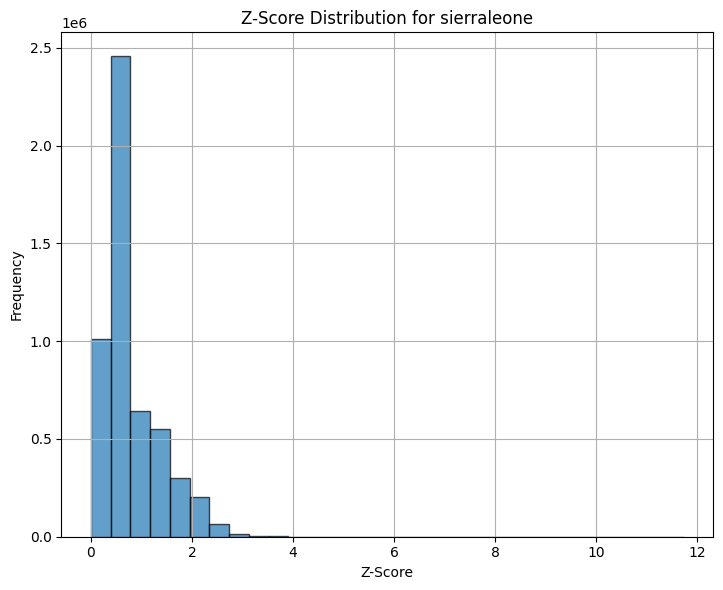

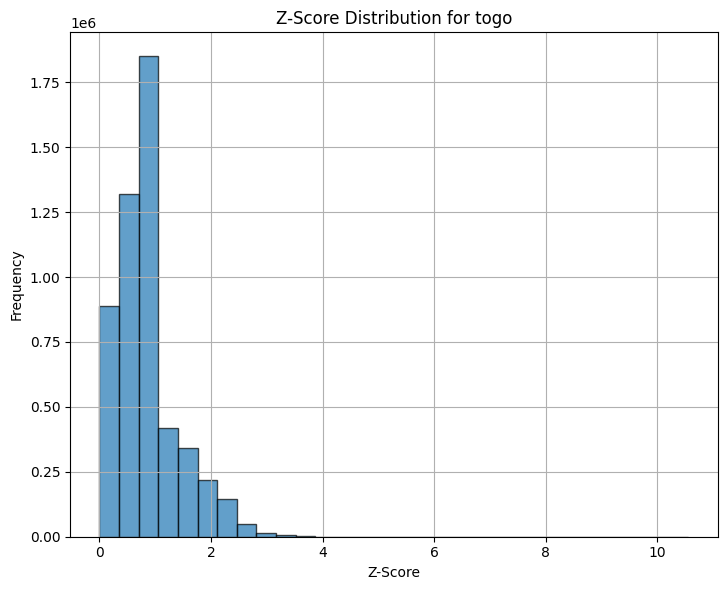

In [78]:
tables_to_check = [slb,bm,tdp]
country_name = ["benin","sierraleone","togo"]
for index,df in enumerate(tables_to_check):
    z_score_analysis(df, country_name[index])

In [88]:
# Function for time series analysis
def time_series_analysis(df, country_name):
    plt.figure(figsize=(6, 2))
    plt.plot(df['GHI'], label='GHI')
    plt.plot(df['DNI'], label='DNI')
    plt.plot(df['DHI'], label='DHI')
    plt.plot(df['Tamb'], label='Tamb')
    plt.legend()
    plt.title(f'Time Series Analysis for {country_name}')
    plt.show()



In [89]:
tables_to_check = [slb,bm,tdp]
country_name = ["benin","sierraleone","togo"]
for index,df in enumerate(tables_to_check):
    time_series_analysis(df, country_name[index])

c:\Users\Fevu\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
